In [1]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import cartopy.crs as ccrs
import cartopy.feature as feature
import cmocean.cm
import xarray as xr
# fix to cartopy issue right now
from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh
from cartopy.util import add_cyclic_point

In [3]:
# Load data
direc = '/tigress/janewb/public_html/HITOPO/'
files = {}
zsurf = {}
files['obs'] = direc+'obs.etopo5.zsurf.nc'
zsurf['obs'] = (xr.open_dataset(files['obs']).rename({'ETOPO05_X':'lon','ETOPO05_Y':'lat'})/1000).ROSE

In [4]:
# Regrid to different lats and lons
lon = {}
lat = {}
for i in [0.25,0.5,1,2,3]:
    lon[str(i)] = np.arange(0,360+i,i)
    lat[str(i)] = np.arange(-90,90+i,i)
    zsurf[str(i)] = zsurf['obs'].interp(lon=lon[str(i)],lat=lat[str(i)], method = 'linear')

maxz = {}
for key in zsurf.keys():
     maxz[key] = np.squeeze(zsurf[key].sel(lon=slice(240,285)).sel(lat=slice(-30,30)).max('lon'))

In [5]:
# RESOLUTIONS OF MODEL INTERCOMPARISON PROJECTS
# LAT X LON resolution at the equator, atmosphere

# from here: https://pcmdi.llnl.gov/ipcc/model_documentation/ipcc_model_documentation.php
# checking the resolution
cmip3 = {'BCC-CM1':[1.875,1.875],
         'BCCR-BCM2.0':[2.8,2.8],
         'CCSM3':[1.4,1.4],
         'CGCM3.1(T47)':[2.5,2.5],
         'CGCM3.1(T63)':[1.875,1.875],
         'CNRM-CM3':[2.8,2.8],
         'CSIRO-Mk3.0':[1.875,1.875],
         'CSIRO-Mk3.5':[1.875,1.875],
         'ECHAM5/MPI-OM':[1.875,1.875],
         'ECHO-G':[2.8,2.8],
         'FGOALS-g1.0':[2.8,2.8],
         'GFDL-CM2.0':[2,2.5],
         'GFDL-CM2.1':[2,2.5],
         'GISS-AOM':[3,4],
         'GISS-EH':[4,5],
         'GISS-ER':[4,5],
         'INGV-SXG':[1.125,1.125],
         'INM-CM3.0':[2,2.5],
         'IPSL-CM4':[2.5,3.75],
         'MIROC3.2(hires)':[1.12,1.12],
         'MIROC3.2(medres)':[2.8,2.8],
         'MRI-CGCM2.3.2':[2.8,2.8],
         'PCM':[2.8,2.8],
         'UKMO-HadCM3':[2.75,3.75],
         'UKMO-HadGEM1':[1.25,1.875]}

# from here: https://portal.enes.org/data/enes-model-data/cmip5/resolution
cmip5 = {'ACCESS1.0':[1.25,1.875],
         'ACCESS1.3':[1.25,1.875],
         'BCC-CSM1.1':[2.7906,2.8125],
         'BCC-CSM1.1(m)':[2.7906,2.8125],
         'BNU-ESM':[2.7906,2.8125],
         'CCSM4':[0.9424,1.25],
         'CESM1(BGC)':[0.9424,1.25],
         'CESM1(CAM5)':[0.9424,1.25],
         'CESM1(FASTCHEM)':[0.9424,1.25],
         'CESM1(WACCM)':[1.8848,2.5],
         'CFSv2-2011':[1,1],
         'CMCC-CESM':[3.4431,3.75],
         'CMCC-CM':[0.7484,0.75],
         'CMCC-CMS':[3.7111,3.75],
         'CNRM-CM5':[1.4008,1.40625],
         'CNRM-CM5-2':[1.4008,1.40625],
         'CSIRO-Mk3.6.0':[1.8653,1.875],
         'CSIRO-Mk3L-1-2':[3.1857,5.625],
         'CanAM4':[2.7906,2.8125],
         'CanCM4':[2.7906,2.8125],
         'CanESM2':[2.7906,2.8125],
         'EC-EARTH':[1.1215,1.125],
         'FGOALS-g2':[2.7906,2.8125],
         'FGOALS-gl':[4.1026,5],
         'FGOALS-s2':[1.6590,2.8125],
         'GEOS-5':[2,2.5],
         'GFDL-CM2.1':[2.0225,2.5],
         'GFDL-CM3':[2,2.5],
         'GFDL-ESM2G':[2.0225,2],
         'GFDL-ESM2M':[2.0225,2.5],
         'GISS-E2-H':[2,2.5],
         'GISS-E2-H-CC':[2,2.5],
         'GISS-E2-R':[2,2.5],
         'GISS-E2-R-CC':[2,2.5],
         'HadCM3':[2.5,3.75],
         'HadGEM2-A':[1.25,1.875],
         'HadGEM2-AO':[1.25,1.875],
         'HadGEM2-CC':[1.25,1.875],
         'HadGEM2-ES':[1.25,1.875],
         'INM-CM4':[1.5,2],
         'IPSL-CM5A-LR':[1.8947,3.75],
         'IPSL-CM5A-MR':[1.2676,2.5],
         'IPSL-CM5B-LR':[1.8947,3.75],
         'MIROC-ESM':[2.7906,2.8125],
         'MIROC-ESM-CHEM':[2.7906,2.8125],
         'MIROC4h':[0.5616,0.5625],
         'MIROC5':[1.4008,1.40625],
         'MPI-ESM-LR':[1.8653,1.875],
         'MPI-ESM-MR':[1.8653,1.875],
         'MPI-ESM-P':[1.8653,1.875],
         'MRI-AGCM3-2H':[0.562,0.5625],
         'MRI-AGCM3-2S':[0.188,0.1875],
         'MRI-CGCM3':[1.12148,1.125],
         'MRI-ESM1':[1.12148,1.125],
         'NorESM1-M':[1.8947,2.5],
         'NorESM1-ME':[1.8947,2.5]}

# from: https://link.springer.com/article/10.1007/s41748-020-00157-7/tables/1
# additions from Meehl et al 2020 list, checking resolution on ESGF website
cmip6 = {'ACCESS-CM2':[1.3,1.9],
         'ACCESS-ESM1-5':[1.2,1.9],
         'AWI-CM-1-1-M':[0.9,0.9],
         'BCC-CSM2-MR':[1.1,1.1],
         'BCC-ESM1':[2.8,2.8],
         'CAMS-CSM1-0':[1.1,1.1],
         'CanESM5':[2.8,2.8],
         'CESM2':[0.9,1.3],
         'CESM2-WACCM':[0.9,1.3],
         'CNRM-CM6-1':[1.4,1.4],
         'CNRM-CM6-1-HR':[0.5,0.5],
         'CNRM-ESM2-1':[1.4,1.4],
         'E3SM-1-0':[1,1],
         'EC-Earth3':[0.7,0.7],
         'EC-Earth3-Veg':[0.7,0.7],
         'FGOALS-f3-L':[1,1.3],
         'FGOALS-g3':[2.3,2],
         'FIO-ESM-2-0':[0.9,1.3],
         'GFDL-CM4':[1,1],
         'GFDL-ESM4':[1,1.3],
         'GISS-E2-1-G':[2,2.5],
         'GISS-E2-1-H':[2,2.5],
         'GISS-E2-2-G':[2,2.5],
         'HadGEM3-GC31-LL':[1.875,1.25],
         'HadGEM3-GC31-MM':[0.83,0.55],
         'IITM-ESM':[1.89,1.89],
         'INM-CM4-8':[1.5,2],
         'INM-CM5-0':[1.5,2],
         'IPSL-CM6A-LR':[1.3,2.5],
         'KACE-1-0-G':[1.25,1.875],
         'MCM-UA-1-0':[2.5,3.75],
         'MIROC6':[1.4,1.4],
         'MIROC-ES2L':[2.8,2.8],
         'MPI-ESM1-2-HR':[0.9,0.9],
         'MPI-ESM1-2-LR':[1.9,1.9],
         'MRI-ESM2-0':[1.1,1.1],
         'NESM3':[1.9,1.9],
         'NorESM2-LM':[1.9,2.5],
         'NorCPM1':[1.875,2.5],
         'SAM0-UNICON':[0.9375,1.25],
         'UKESM1-0-LL':[1.3,1.9]}

# highresmip: https://pcmdi.llnl.gov/CMIP6/ArchiveStatistics/esgf_data_holdings/HighResMIP/index.html
# example link from ESGF for one model: https://cera-www.dkrz.de/WDCC/ui/cerasearch/cmip6?input=CMIP6.HighResMIP.ECMWF.ECMWF-IFS-LR
highresmip_gridboxes = {'AWI-CM-1-1-HR':[192,384],
             #'AWI-CM-1-1-LR':[96,192],
             'BCC-CSM2-HR':[np.nan,np.nan],
             #'CAMS-CSM1-0':[160,320],
             'CESM1-CAM5-SE-HR':[0.25,0.25],
             #'CESM1-CAM5-SE-LR':[1,1],
             'CMCC-CM2-HR4':[192,288],
             'CMCC-CM2-VHR4':[768,1152],
             #'CNRM-CM6-1':[128,256],
             'CNRM-CM6-1-HR':[360,720],
             #'EC-Earth3P':[256,512],
             'EC-Earth3P-HR':[512,1024],
             'ECMWF-IFS-HR':[800,1600],
             #'ECMWF-IFS-LR':[400,800],
             #'ECMWF-IFS-MR':[400,800],
             'FGOALS-f3-H':[720,1440],
             #'FGOALS-f3-L':[180,360],
             'GFDL-CM4C192':[360,720],
             'HadGEM3-GC31-HH':[768,1024],
             'HadGEM3-GC31-HM':[768,1024],
             #'HadGEM3-GC31-LL':[144,192],
             #'HadGEM3-GC31-LM':[144,192],
             'HadGEM3-GC31-MH':[324,432],
             'HadGEM3-GC31-MM':[324,432],
             'HiRAM-SIT-HR':[np.nan,np.nan],
             #'HiRAM-SIT-LR':[np.nan,np.nan],
             'INM-CM5-H':[np.nan,np.nan],
             'IPSL-CM6A-ATM-HR':[360,512],
             #'IPSL-CM6A-LR':[143,144],
             #'MPI-ESM1-2-HR':[192,384],
             'MPI-ESM1-2-XR':[384,768],
             'MRI-AGCM3-2-H':[320,640],
             'MRI-AGCM3-2-S':[960,1920],
             #'NICAM16-7S':[1,1],
             'NICAM16-8S':[0.5,0.5],
             'NICAM16-9S':[0.25,0.25]}
         

In [6]:
# Select lat and lon data, and convert any gridbox numbers to resolution sizes

cmip3_lats = []
cmip3_lons = []
for key in cmip3.keys():
    cmip3_lats.append(cmip3[key][0])
    cmip3_lons.append(cmip3[key][1])
    
cmip5_lats = []
cmip5_lons = []
for key in cmip5.keys():
    cmip5_lats.append(cmip5[key][0])
    cmip5_lons.append(cmip5[key][1])
    
cmip6_lats = []
cmip6_lons = []
for key in cmip6.keys():
    cmip6_lats.append(cmip6[key][0])
    cmip6_lons.append(cmip6[key][1])

highresmip = {}
for key,val in highresmip_gridboxes.items():
    if val[0]<10:
        highresmip[key] = val
    if val[0] >= 10:
        highresmip[key] = [180/val[0],360/val[1]]
    if val[0] == np.nan:
        pass

highresmip_lats = []
highresmip_lons = []
for key in highresmip.keys():
    highresmip_lats.append(highresmip[key][0])
    highresmip_lons.append(highresmip[key][1])

In [7]:
# Regrid to different lats and lons
lon_res = {'CMIP3':np.median(cmip3_lons),
          'CMIP5':np.median(cmip5_lons),
          'CMIP6':np.median(cmip6_lons),
          'HighResMIP':np.median(highresmip_lons)}
           
lat_res = {'CMIP3':np.median(cmip3_lats),
          'CMIP5':np.median(cmip5_lats),
          'CMIP6':np.median(cmip6_lats),
          'HighResMIP':np.median(highresmip_lats)}
           
for key in lon_res.keys():
    lon[key] = np.arange(0,360+lon_res[key],lon_res[key])
    lat[key] = np.arange(-90,90+lat_res[key],lat_res[key])
    zsurf[key] = zsurf['obs'].interp(lon=lon[key],lat=lat[key], method = 'linear')

maxz = {}
for key in zsurf.keys():
     maxz[key] = np.squeeze(zsurf[key].sel(lon=slice(240,285)).sel(lat=slice(-30,30)).max('lon'))

Text(0.5, 0, 'surface height [km]')

/home/janewb/.conda/envs/py35/lib/python3.5/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/janewb/.conda/envs/py35/lib/python3.5/site-packages/matplotlib/transforms.py:745: RuntimeWarning: invalid value encountered in maximum
  x0 = np.maximum(bbox1.xmin, bbox2.xmin)
/home/janewb/.conda/envs/py35/lib/python3.5/site-packages/matplotlib/transforms.py:746: RuntimeWarning: invalid value encountered in minimum
  x1 = np.minimum(bbox1.xmax, bbox2.xmax)
/home/janewb/.conda/envs/py35/lib/python3.5/site-packages/matplotlib/transforms.py:747: RuntimeWarning: invalid value encountered in maximum
  y0 = np.maximum(bbox1.ymin, bbox2.ymin)
/home/janewb/.conda/envs/py35/lib/python3.5/site-packages/matplotlib/transforms.py:748: RuntimeWarning: invalid value encountered in minimum
  y1 = np.minimum(bbox1.ymax, bbox2.ymax)
/home/janewb/.conda/envs/py35/lib/python3.5/site-packages/matplotlib/

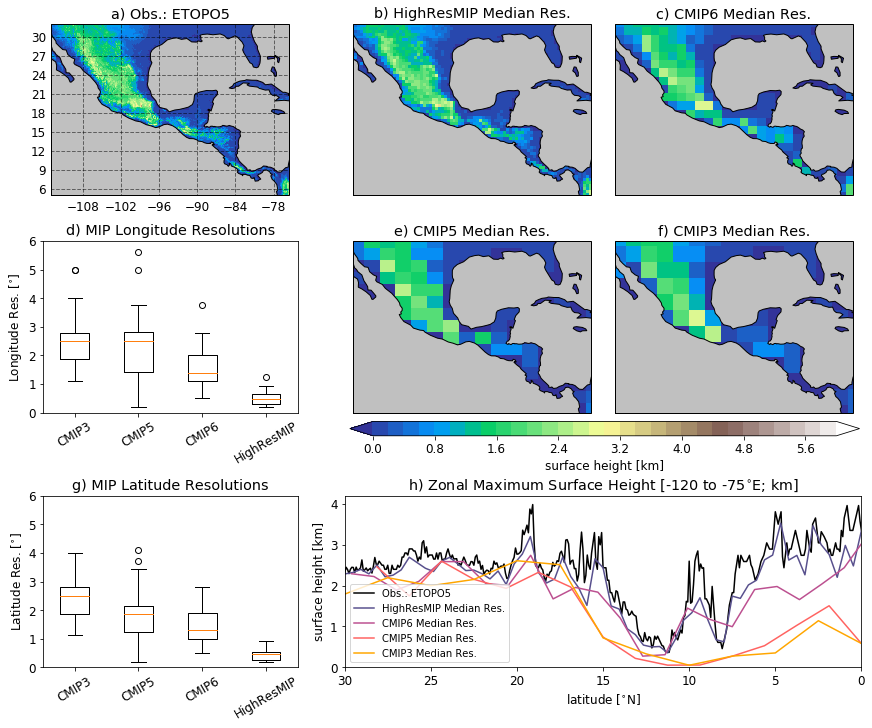

In [9]:
# Region for plotting
lonmin = 247
lonmax = 284.5
latmin = 5
latmax = 32
lev = np.arange(0,6.200,0.200) # consistent with other figures topography
#lev = np.arange(0,4+0.2,0.200)
cmap = plt.cm.terrain
proj1 = ccrs.PlateCarree(central_longitude = 0) #ccrs.Robinson()

fig = plt.figure(constrained_layout=True, figsize=(12,10))
gs = fig.add_gridspec(3, 3)
fs = 12
plt.rcParams.update({'font.size': fs})

ax1 = fig.add_subplot(gs[0, 0], projection= proj1)
ax1.set_extent([lonmin, lonmax, latmin, latmax], ccrs.PlateCarree())
im = zsurf['obs'].plot(transform=ccrs.PlateCarree(), levels = lev, cmap = cmap, add_colorbar = False)
ax1.add_feature(feature.OCEAN, zorder=1, edgecolor='k', facecolor = 'silver')
plt.title('a) Obs.: ETOPO5')
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='k', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
ax1.set_xlabel('longitude [$^{\circ}$E]')
ax1.set_ylabel('latitude [$^{\circ}$N]')

ax = fig.add_subplot(gs[0, 1], projection= proj1)
ax.set_extent([lonmin, lonmax, latmin, latmax], ccrs.PlateCarree())
zsurf['HighResMIP'].plot(transform=ccrs.PlateCarree(), levels = lev, cmap = cmap, add_colorbar = False)
ax.add_feature(feature.OCEAN, zorder=1, edgecolor='k', facecolor = 'silver')
plt.title(r'b) HighResMIP Median Res.')

ax = fig.add_subplot(gs[0, 2], projection= proj1)
ax.set_extent([lonmin, lonmax, latmin, latmax], ccrs.PlateCarree())
zsurf['CMIP6'].plot(transform=ccrs.PlateCarree(), levels = lev, cmap = cmap, add_colorbar = False)
ax.add_feature(feature.OCEAN, zorder=1, edgecolor='k', facecolor = 'silver')
plt.title(r'c) CMIP6 Median Res.')

ax = fig.add_subplot(gs[1, 1], projection= proj1)
ax.set_extent([lonmin, lonmax, latmin, latmax], ccrs.PlateCarree())
zsurf['CMIP5'].plot(transform=ccrs.PlateCarree(), levels = lev, cmap = cmap, add_colorbar = False)
ax.add_feature(feature.OCEAN, zorder=1, edgecolor='k', facecolor = 'silver')
plt.title(r'e) CMIP5 Median Res.')

ax = fig.add_subplot(gs[1, 2], projection= proj1)
ax.set_extent([lonmin, lonmax, latmin, latmax], ccrs.PlateCarree())
zsurf['CMIP3'].plot(transform=ccrs.PlateCarree(), levels = lev, cmap = cmap, add_colorbar = False)
ax.add_feature(feature.OCEAN, zorder=1, edgecolor='k', facecolor = 'silver')
plt.title(r'f) CMIP3 Median Res.')

# MIP Res Box and Whisker Plots
ax = fig.add_subplot(gs[1, 0])
data = [cmip3_lons,cmip5_lons,cmip6_lons,highresmip_lons]
plt.boxplot(data)
plt.xticks([1, 2, 3, 4], ['CMIP3','CMIP5','CMIP6','HighResMIP'],rotation=30)
plt.ylabel('Longitude Res. [$^{\circ}$]')
plt.title('d) MIP Longitude Resolutions')
plt.ylim([0,6])

ax = fig.add_subplot(gs[2, 0])
data = [cmip3_lats,cmip5_lats,cmip6_lats,highresmip_lats]
plt.boxplot(data)
plt.xticks([1, 2, 3, 4], ['CMIP3','CMIP5','CMIP6','HighResMIP'],rotation=30)
plt.ylabel('Latitude Res. [$^{\circ}$]')
plt.title('g) MIP Latitude Resolutions')
plt.ylim([0,6])

ax = fig.add_subplot(gs[2, 1:])
plt.plot(maxz['obs'].lat, maxz['obs'],color='k',label='Obs.: ETOPO5')
plt.plot(maxz['HighResMIP'].lat, maxz['HighResMIP'],color='#58508d',label='HighResMIP Median Res.')
plt.plot(maxz['CMIP6'].lat, maxz['CMIP6'],color='#bc5090',label='CMIP6 Median Res.')
plt.plot(maxz['CMIP5'].lat, maxz['CMIP5'],color='#ff6361', label='CMIP5 Median Res.')
plt.plot(maxz['CMIP3'].lat, maxz['CMIP3'],color='#ffa600', label='CMIP3 Median Res.')
plt.ylabel('surface height [km]')
plt.xlabel('latitude [$^{\circ}$N]')
plt.legend(fontsize=10,loc='lower left')
plt.title('h) Zonal Maximum Surface Height [-120 to -75$^{\circ}$E; km]')
ax.set_xlim(30, 0)
ax.set_ylim([0, 4.2])

# Topography Colorbar
cb_ax = fig.add_axes([0.4, 0.4, 0.59, 0.02])
cb = fig.colorbar(im, cax=cb_ax, orientation = 'horizontal')
cb.ax.set_xlabel('surface height [km]')

#plt.savefig('cmip_res.pdf')
#plt.savefig('cmip_res.png', dpi = 600)